# Introduction

This data collects information from 100000 medical appointments in Brazil and focuses on the question of whether patients show up for their appointments or not.

1-Does the patients gender affect attendance?

2- Does Receiving SMS Affect the patient to attend his appointment ?

2-What is the effect of Scholarship on Attendance?

4-Which ages are the most missed of her appointment and which are the most attended ?


In [1]:
# import the important libraries
import pandas as pd  #For data manipulation 
import numpy as np  #For scientific computing
import matplotlib.pyplot as plt  #For data visualization 
import seaborn as sns
#For more advamced data visualization 
%matplotlib inline

#  Data Wrangling


General Properties

In [2]:
 # load the data and display the top 7 rows
df=pd.read_csv('dd.csv',sep= (','))
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [3]:
# now we check the describtive analysis for the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [5]:
# display the top 7 rows
df.head(7)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes


# Determine the number of rows and columns

In [6]:
#display number of rows and columns
df.shape

(110527, 10)

In [7]:
# basic info about the data: number of rows and columns, data types, missing values ..etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


We have to make sure that we don't have numbers less than zero

In [8]:
#Ensure that the age column does not contain a number less than 0 
df[df["Age"] < 0].shape[0]

1

# drop the Age which is less than 0

In [9]:
df.drop(df[df["Age"] < 0].index, inplace=True)
df[df["Age"] < 0].shape[0]

0

In [10]:
# now we check the describtive analysis for the data
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#renaming columns.
df.rename(columns={'No-show':'Attendance'},inplace=True)

# i will replace the values no or yase to 0 or 1In the attendance column

In [13]:
df['Attendance'].replace("Yes" , 0 , inplace = True)
df['Attendance'].replace("No" , 1 , inplace = True)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendance
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [14]:
# basic info about the data: number of rows and columns, data types, missing values ..etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hipertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handcap        110526 non-null  int64 
 8   SMS_received   110526 non-null  int64 
 9   Attendance     110526 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 9.3+ MB


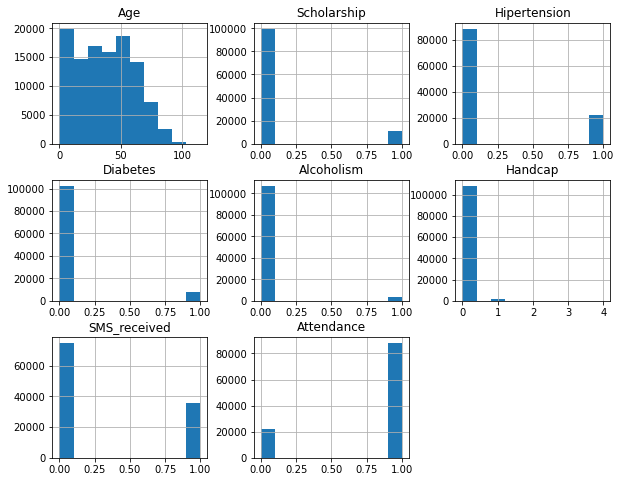

In [15]:
df.hist(figsize=(10,8));

In [16]:
df.fillna(df.mean(),inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110526 non-null  object
 1   Age            110526 non-null  int64 
 2   Neighbourhood  110526 non-null  object
 3   Scholarship    110526 non-null  int64 
 4   Hipertension   110526 non-null  int64 
 5   Diabetes       110526 non-null  int64 
 6   Alcoholism     110526 non-null  int64 
 7   Handcap        110526 non-null  int64 
 8   SMS_received   110526 non-null  int64 
 9   Attendance     110526 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 9.3+ MB


In [17]:
# check for duplicated values
df.duplicated().sum()

68974

In [18]:
# remove any duplicates found
df.drop_duplicates(inplace=True)


# now we check again
df.duplicated().sum()


0

In [19]:
# now we check the describtive analysis for the data
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendance
count,41552.000000,41552.000000,41552.000000,41552.000000,41552.000000,41552.000000,41552.000000,41552.000000
mean,42.086205,0.147117,0.299143,0.122690,0.047747,0.039300,0.413217,0.690195
std,23.070634,0.354227,0.457888,0.328085,0.213234,0.215007,0.492417,0.462418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


# Exploratory Data Analysis

    Now that we've trimmed and cleaned our data, we're ready to move on to exploration. We compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.


# 1-Does the patients gender affect attendance?

In [20]:
df.groupby(['Attendance','Gender'], as_index=False).size()

,Attendance,Gender,size
0,0,F,8151
1,0,M,4722
2,1,F,17710
3,1,M,10969


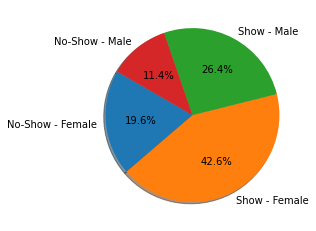

In [21]:
labels = ['No-Show - Female', 'Show - Female', 'Show - Male', 'No-Show - Male']
sizes = [len(df[(df['Attendance'] == 0) & (df['Gender'] == 'F')]),
         len(df[(df['Attendance'] == 1) & (df['Gender'] == 'F')]),        
         len(df[(df['Attendance'] == 1) & (df['Gender'] == 'M')]),
         len(df[(df['Attendance'] == 0) & (df['Gender'] == 'M')])]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.show()


From what we see in front of us, women are more eager to attend appointments than men

# 2- Does Receiving SMS Affect the patient to attend his appointment ?

In [22]:
df.groupby(['Attendance','SMS_received'], as_index=False).size()

,Attendance,SMS_received,size
0,0,0,6976
1,0,1,5897
2,1,0,17406
3,1,1,11273


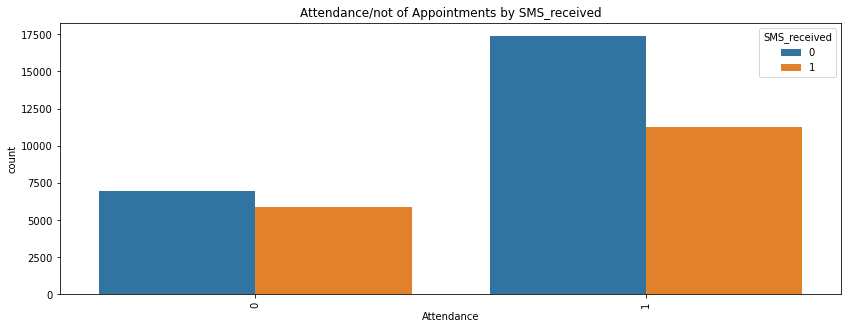

In [23]:
plt.figure(figsize=(14,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df[
'Attendance'] , hue = df['SMS_received'])
ax.set_title("Attendance/not of Appointments by SMS_received")
plt.show()

It is clear from the figure in front of us that the messages do not significantly affect the help in increasing the number of attendance

# 3-What is the effect of Scholarship on Attendance?

In [24]:
df.groupby(['Attendance','Scholarship'], as_index=False).size()

,Attendance,Scholarship,size
0,0,0,11016
1,0,1,1857
2,1,0,24423
3,1,1,4256


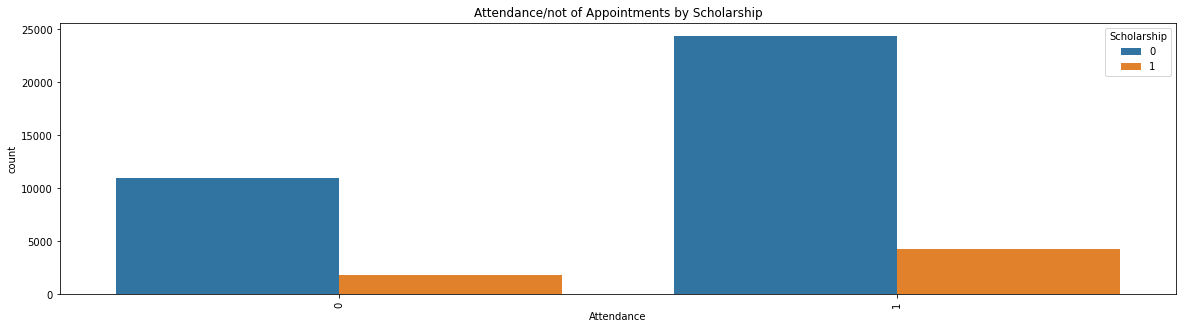

In [25]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df[
'Attendance'] , hue = df['Scholarship'])
ax.set_title("Attendance/not of Appointments by Scholarship")
plt.show()

It appears in this graph that there are many people who did not register for the scholarship and that the percentage of those who attended among those registered with the scholarship was much lower than those who did not.This means that registration for the grant is not a reason to adhere to the appointment.

# 4-Which ages are the most missed of her appointment and which are the most attended ?

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df[
'Age'] , hue = df['Attendance'])
ax.set_title("Attendance/not of Appointments by Age")
plt.show()

We note from the chart in front of us that the attendance rate for children and the youth category is considered to be almost constant, while those whose ages are between 40 and 60, the percentage of attendance for the appointment is greater than others and the percentage continues to decrease with age

# Conclusions
This report examined a dataset of Brazilian patients, trying to figure out what are the factors that correlates with no_show appointments.


Results:

 1-As for SMS_received, we noticed that there are a large number of people who did not receive any messages, and SMS_received do not affect the commitment to attend.

 2-  the report found that there is large number of women visit the doctor compared to men As they are more eager to attend their appointments. 

3-We can see that most of the patients did not register with the scholarship We can notice that 7% of patients received a scholarshipHowever, The largest number was forwho received the not scholarship attended.

4-With regard to age, we have found that older people stick to their appointments more than young people and children.

Limitations:

1-we (almost always) find issues with the sample of data that we are working with (missing observations, data that appears to be inconsistent.

  2-  Some results were counter-intuitive, The analysis found that there is a  higher chance of no_show for those who  register with the scholarshil. The nature of the data prevents further investigation.

3-  we have not done any statistical tests in this analysis, we can not imply any statistical conclusions as well as we can not imply any causation from our correlation findings.